In [1]:
%load_ext lab_black

In [2]:
import os

os.chdir("../..")

In [3]:
from sklearn_extra.cluster import KMedoids
import pandas as pd
import matplotlib.pyplot as plt
from utils.read_final_data import read_train_test_data
from utils.visualisation import (
    get_metrics_of_model,
    plot_clustering,
    plot_clustering_from_clusters,
)
from models.metrics import metrics_list

In [4]:
X_train, X_test = read_train_test_data()
df_train, df_test = (
    pd.read_pickle("resources/data/train_data.pkl"),
    pd.read_pickle("resources/data/test_data.pkl"),
)
train_clusters = df_train.label
test_clusters = df_test.label

In [12]:
n_clusters = 5
kmedoids = KMedoids(n_clusters=n_clusters)

In [6]:
get_metrics_of_model(kmedoids, metrics_list, X_train, X_test)

value                 
sample                         test            train
metric                                              
Silhouette                 0.035459         0.018866
mean_inclust_dist         60.735034        80.860616
min_interclust_dist       17.227886         8.551051
wcss                 4492750.238052  18916647.595315

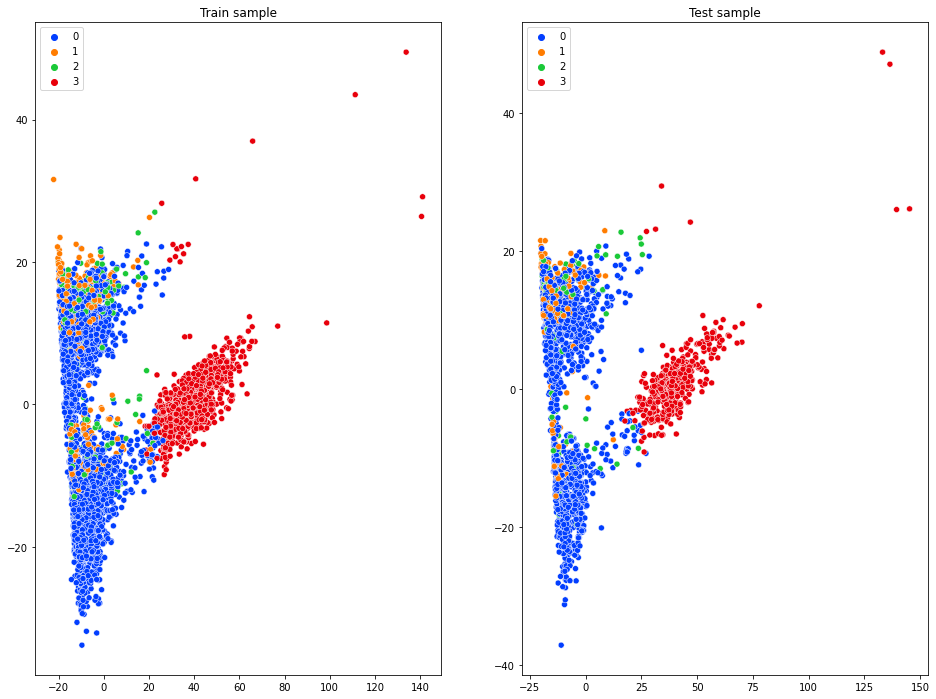

In [7]:
plot_clustering(kmedoids, X_train, X_test)

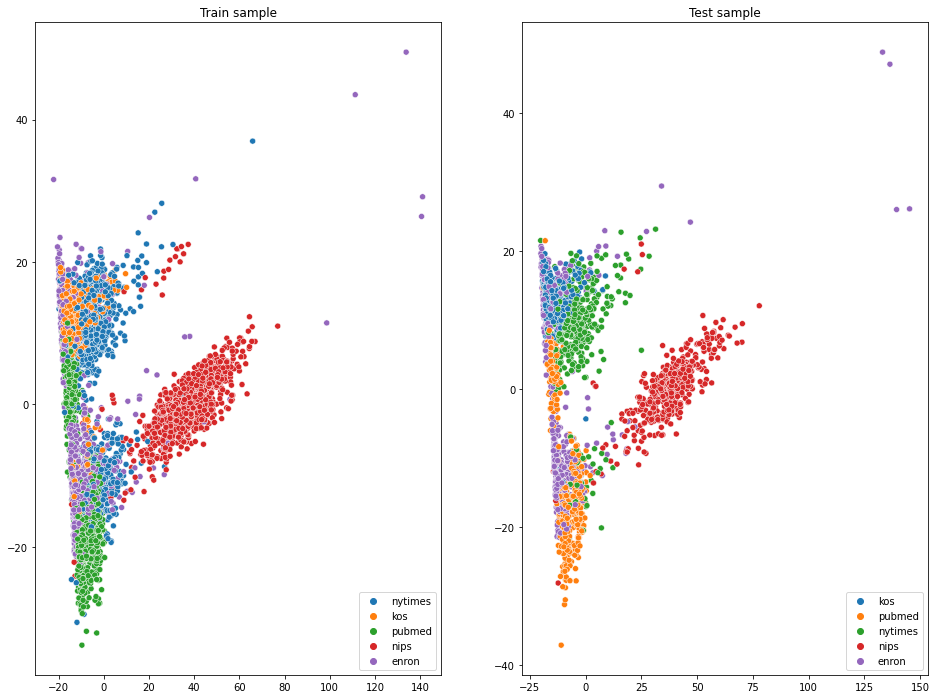

In [8]:
plot_clustering_from_clusters(X_train, X_test, train_clusters, test_clusters)

In [13]:
kmedoids.fit(X_train)
df_train = df_train.assign(pred=kmedoids.predict(X_train))
df_test = df_test.assign(pred=kmedoids.predict(X_test))

In [14]:
def get_cluster_summary(df):
    summary = pd.pivot(
        data=df.groupby(["label", "pred"], as_index=False).size(),
        index="pred",
        columns="label",
    ).fillna(0)
    return summary.div(summary.values.sum(axis=1), axis=0)


get_cluster_summary(df_train)

size                                        
label     enron       kos      nips   nytimes    pubmed
pred                                                   
0      0.233827  0.177836  0.021468  0.250943  0.315927
1      0.318095  0.470476  0.011429  0.194286  0.005714
2      0.194767  0.529070  0.017442  0.235465  0.023256
3      0.015244  0.000000  0.977642  0.007114  0.000000
4      0.210526  0.684211  0.000000  0.065789  0.039474

In [15]:
get_cluster_summary(df_test)

size                                        
label     enron       kos      nips   nytimes    pubmed
pred                                                   
0      0.226918  0.169701  0.021456  0.263329  0.318596
1      0.395000  0.485000  0.000000  0.095000  0.025000
2      0.242188  0.562500  0.039062  0.140625  0.015625
3      0.018913  0.000000  0.978723  0.002364  0.000000
4      0.200000  0.733333  0.000000  0.066667  0.000000